In [1]:
import pandas as pd
import numpy as np
import io
import requests
from datetime import datetime
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

In [2]:
path = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv"
s=requests.get(path).content
data =pd.read_csv(io.StringIO(s.decode('utf-8')))
data.sample(3)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
157,0,91,toyota,std,four,hatchback,fwd,front,95.7,0.799135,0.894444,52.8,2122,ohc,four,98,2bbl,3.19,3.03,9.0,70.0,4800.0,28,34,8358.0,8.392857,Low,0,1
160,1,168,toyota,std,two,hatchback,rwd,front,94.5,0.810668,0.888889,52.6,2204,ohc,four,98,2bbl,3.19,3.03,9.0,70.0,4800.0,29,34,8238.0,8.103448,Low,0,1
112,0,161,peugot,std,four,sedan,rwd,front,107.9,0.897165,0.950000,56.7,3075,l,four,120,mpfi,3.46,3.19,8.4,97.0,5000.0,19,24,16630.0,12.368421,Low,0,1


1. đổi tên cột:

In [3]:
#data.columns = 
a = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration",
           "num-of-doors", "body-style", "drive-wheels", "engine-location",
           "wheel-base", "length", "width", "height", "curb-weight",
           "engine-type", "num-of-cylinders", "engine-size", "fuel-system",
           "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
           "city-mpg", "highway-mpg", "price"]
len(a)

26

2. Khảo sát:


In [4]:
print("Shape: ",data.shape)
print("data type:\n ",data.dtypes)

Shape:  (201, 29)
data type:
  symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [6]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


3) Xử lý null:

In [7]:
def get_data_null(data):
  list_col = data.columns
  final_data_null = pd.DataFrame(columns= list_col)
  for col in list_col:
    bool_series = pd.isnull(data[col])
    data_null = data[bool_series]
    final_data_null = pd.concat([final_data_null,data_null])
  return final_data_null

In [8]:
data_null = get_data_null(data)
print(data_null.shape)
data_null

(5, 29)


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
52,3,150,mazda,std,two,hatchback,rwd,front,95.3,0.812110,0.912500,49.6,2380,rotor,two,70,4bbl,3.329751,NaN,9.4,101.0,6000.0,17,23,10945.0,13.823529,Low,0,1
53,3,150,mazda,std,two,hatchback,rwd,front,95.3,0.812110,0.912500,49.6,2380,rotor,two,70,4bbl,3.329751,NaN,9.4,101.0,6000.0,17,23,11845.0,13.823529,Low,0,1
54,3,150,mazda,std,two,hatchback,rwd,front,95.3,0.812110,0.912500,49.6,2385,rotor,two,70,4bbl,3.329751,NaN,9.4,101.0,6000.0,17,23,13645.0,13.823529,Low,0,1
55,3,150,mazda,std,two,hatchback,rwd,front,95.3,0.812110,0.912500,49.6,2500,rotor,two,80,mpfi,3.329751,NaN,9.4,135.0,6000.0,16,23,15645.0,14.687500,Medium,0,1
46,0,122,jaguar,std,two,sedan,rwd,front,102.0,0.921192,0.980556,47.8,3950,ohcv,twelve,326,mpfi,3.540000,2.76,11.5,262.0,5000.0,13,17,36000.0,18.076923,NaN,0,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [10]:
data_not_null = data.dropna()
print(data_not_null.shape)

(196, 29)


In [11]:
drop_col = data.drop('symboling',axis = 1)
drop_col.shape

(201, 28)

In [12]:
data_fillna_with_mean = data.fillna(data.mean())

In [13]:
get_data_null(data_fillna_with_mean)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
46,0,122,jaguar,std,two,sedan,rwd,front,102.0,0.921192,0.980556,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0,18.076923,NaN,0,1


In [54]:
#check data null after fillna with mean
data_fillna_with_frequency = data.fillna(data.mode().iloc[0])
get_data_null(data_fillna_with_frequency)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas


4. Tạo một data.frame thống kê các chỉ số: min, average, max của các chỉ số 
    sau theo số lượng cửa.
      - price, stroke, num-of-cylinders, width, height
      
    Khảo sát tương tự cho cột num-of-cylinders & make

In [14]:
data.groupby('num-of-doors').agg({'price':'min', 'stroke':'min', 'num-of-cylinders':'min', 'width':'min', 'height':'min'})

,price,stroke,num-of-cylinders,width,height
num-of-doors,,,,,
four,6229.0,2.19,eight,0.858333,50.6
two,5118.0,2.07,eight,0.837500,47.8


In [3]:
from word2number import w2n

data['num-of-cylinders-convert'] = data['num-of-cylinders'].apply(w2n.word_to_num)
data.groupby('num-of-doors').agg({'price':'mean', 'stroke':'mean', 'num-of-cylinders-convert':'mean', 'width':'mean', 'height':'mean'})

,price,stroke,num-of-cylinders-convert,width,height
num-of-doors,,,,,
four,13498.034783,3.254783,4.365217,0.920857,54.903478
two,12818.127907,3.259878,4.360465,0.907461,52.246512


In [4]:
data.groupby('num-of-doors').agg({'price':'max', 'stroke':'max', 'num-of-cylinders':'max', 'width':'max', 'height':'max'})

,price,stroke,num-of-cylinders,width,height
num-of-doors,,,,,
four,40960.0,4.17,six,0.995833,59.8
two,45400.0,3.90,two,1.000000,56.1


In [5]:
data.groupby('num-of-cylinders').agg({'price':'min', 'stroke':'min', 'num-of-doors':'min', 'width':'min', 'height':'min'})

,price,stroke,num-of-doors,width,height
num-of-cylinders,,,,,
eight,34184.0,3.10,four,0.979167,50.8
five,13295.0,3.40,four,0.920833,53.1
four,5118.0,2.07,four,0.858333,48.8
six,13499.0,2.87,four,0.900000,49.7
three,5151.0,3.03,two,0.837500,53.2
twelve,36000.0,2.76,two,0.980556,47.8
two,10945.0,NaN,two,0.912500,49.6


In [6]:
data['num-of-doors-convert'] = data['num-of-doors'].apply(w2n.word_to_num)
data.groupby('num-of-cylinders').agg({'price':'mean', 'stroke':'mean', 'num-of-doors-convert':'mean', 'width':'mean', 'height':'mean'})

,price,stroke,num-of-doors-convert,width,height
num-of-cylinders,,,,,
eight,38900.000000,3.225000,3.000000,0.992708,54.850000
five,22007.600000,3.496000,3.600000,0.967222,55.620000
four,10303.197452,3.238344,3.171975,0.907325,53.826115
six,23671.833333,3.314167,3.083333,0.932465,53.391667
three,5151.000000,3.030000,2.000000,0.837500,53.200000
twelve,36000.000000,2.760000,2.000000,0.980556,47.800000
two,13020.000000,NaN,2.000000,0.912500,49.600000


In [7]:
data.groupby('num-of-cylinders').agg({'price':'max', 'stroke':'max', 'num-of-doors':'max', 'width':'max', 'height':'max'})

,price,stroke,num-of-doors,width,height
num-of-cylinders,,,,,
eight,45400.0,3.35,two,1.000000,56.7
five,31600.0,3.64,two,0.995833,58.7
four,22625.0,3.90,two,0.956944,59.8
six,41315.0,4.17,two,0.984722,56.3
three,5151.0,3.03,two,0.837500,53.2
twelve,36000.0,2.76,two,0.980556,47.8
two,15645.0,NaN,two,0.912500,49.6


In [8]:
data.groupby('make').agg({'price':'min', 'stroke':'min', 'num-of-doors':'min', 'width':'min', 'height':'min'})

,price,stroke,num-of-doors,width,height
make,,,,,
alfa-romero,13495.0,2.68,two,0.890278,48.8
audi,13950.0,3.40,four,0.919444,53.1
bmw,16430.0,2.80,four,0.900000,53.7
chevrolet,5151.0,3.03,four,0.837500,52.0
dodge,5572.0,3.23,four,0.886111,50.2
honda,5399.0,3.07,four,0.868056,50.8
isuzu,6785.0,3.23,four,0.858333,51.4
jaguar,32250.0,2.76,four,0.966667,47.8
mazda,5195.0,3.15,four,0.891667,49.6


In [9]:
data.groupby('make').agg({'price':'mean', 'stroke':'mean', 'num-of-doors-convert':'mean', 'width':'mean', 'height':'mean'})

,price,stroke,num-of-doors-convert,width,height
make,,,,,
alfa-romero,15498.333333,2.943333,2.000000,0.896759,50.000000
audi,17859.166667,3.400000,3.666667,0.956250,54.833333
bmw,26118.750000,3.167500,3.250000,0.923264,54.825000
chevrolet,6007.000000,3.083333,2.666667,0.868056,52.400000
dodge,7875.444444,3.365556,3.111111,0.891204,51.644444
honda,8184.692308,3.462308,2.769231,0.894231,53.238462
isuzu,8916.500000,3.230000,3.000000,0.881944,52.450000
jaguar,34600.000000,3.700000,3.333333,0.971296,51.133333
mazda,10652.882353,3.299231,2.941176,0.910948,53.358824


In [10]:
data.groupby('make').agg({'price':'max', 'stroke':'max', 'num-of-doors':'max', 'width':'max', 'height':'max'})

,price,stroke,num-of-doors,width,height
make,,,,,
alfa-romero,16500.0,3.47,two,0.909722,52.4
audi,23875.0,3.40,two,0.991667,55.9
bmw,41315.0,3.39,two,0.984722,56.3
chevrolet,6575.0,3.11,two,0.883333,53.2
dodge,12964.0,3.90,two,0.920833,59.8
honda,12945.0,3.58,two,0.916667,58.3
isuzu,11048.0,3.23,two,0.905556,53.5
jaguar,36000.0,4.17,two,0.980556,52.8
mazda,18344.0,3.64,two,0.923611,55.5


5. Filtering (num-of-cylinders, price):
- Tìm ra những dòng xe 4 bánh và có giá trên 11k
- Có hay không xe 6 bánh, có hoursePower > 5125 & giá < 5k

In [11]:
four_cylinder_above11k = data[(data['num-of-cylinders'] == 'four')& (data['price']>= 11000)]
print(four_cylinder_above11k.shape)
four_cylinder_above11k.sample(3)

(52, 31)


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,num-of-cylinders-convert,num-of-doors-convert
132,3,150,saab,turbo,two,hatchback,fwd,front,99.1,0.896684,0.923611,56.1,2808,dohc,four,121,mpfi,3.54,3.07,9.0,160.0,5500.0,19,26,18150.0,12.368421,High,0,1,4,2
167,2,134,toyota,std,two,hatchback,rwd,front,98.4,0.846708,0.911111,52.0,2714,ohc,four,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,11549.0,9.791667,Medium,0,1,4,2
166,2,134,toyota,std,two,hardtop,rwd,front,98.4,0.846708,0.911111,52.0,2679,ohc,four,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,11199.0,9.791667,Medium,0,1,4,2


In [12]:
six_cylinder_below5k = data[(data['num-of-cylinders'] == 'six')&(data['horsepower'] >5125)& (data['price']> 5000)]
print(six_cylinder_below5k.shape)
six_cylinder_below5k.head()

(0, 31)


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,num-of-cylinders-convert,num-of-doors-convert


6. binning
- Dựa trên horsepower để Filling những giá trị NULL horsepower-binned
- Dựa trên "price", tạo 1 cột "group" bằng cách xét:
      + 0 < price < 10k => "low" 
      + 10k <= price < 20k => "medium"
      + 20k <= price => "high"

In [124]:
data.groupby(['horsepower-binned']).agg({'horsepower':['min','mean','max']})

horsepower                   
                         min        mean    max
horsepower-binned                              
High                   156.0  174.782609  207.0
Low                     48.0   78.026087  101.0
Medium                 102.0  121.443747  155.0

In [111]:
data[(data['horsepower-binned'].isnull())]

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,num-of-cylinders-convert,num-of-doors-convert
46,0,122,jaguar,std,two,sedan,rwd,front,102.0,0.921192,0.980556,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262.0,5000.0,13,17,36000.0,18.076923,NaN,0,1,12,2


### horsepower có giá trị 262 nên fill horsepower-binned là 'High'

In [115]:
def get_group_price(price):
  if price < 10000:
    group_price = 'low'
  elif (price >= 10000) and (price < 20000):
    group_price = 'medium'
  elif price >= 20000:
    group_price = 'high'
  return group_price

In [116]:
data['group_price'] = data['price'].apply(get_group_price)

In [119]:
data.sample(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,num-of-cylinders-convert,num-of-doors-convert,group_price
29,2,137,honda,std,two,hatchback,fwd,front,86.6,0.694858,0.887500,50.8,1713,ohc,four,92,1bbl,2.91,3.41,9.60,58.0,4800.0,49,54,6479.0,4.795918,Low,0,1,4,2,low
119,1,154,plymouth,std,four,sedan,fwd,front,93.7,0.803940,0.886111,50.8,2191,ohc,four,98,2bbl,2.97,3.23,9.40,68.0,5500.0,31,38,7609.0,7.580645,Low,0,1,4,4,low
20,1,118,dodge,std,two,hatchback,fwd,front,93.7,0.755887,0.886111,50.8,1876,ohc,four,90,2bbl,2.97,3.23,9.41,68.0,5500.0,37,41,5572.0,6.351351,Low,0,1,4,2,low
82,1,125,mitsubishi,std,four,sedan,fwd,front,96.3,0.828448,0.908333,51.6,2365,ohc,four,122,2bbl,3.35,3.46,8.50,88.0,5000.0,25,32,6989.0,9.400000,Low,0,1,4,4,low
39,0,85,honda,std,four,sedan,fwd,front,96.5,0.842864,0.868056,54.1,2372,ohc,four,110,1bbl,3.15,3.58,9.00,86.0,5800.0,27,33,10295.0,8.703704,Low,0,1,4,4,medium


### Ex2:

In [18]:
data = pd.read_excel("./Data/Data - Single Worksheet.xlsx")
print(data.shape)
data.head(3)

(12, 4)


,First Name,Last Name,City,Gender
0,Brandon,James,Miami,M
1,Sean,Hawkins,Denver,M
2,Judy,Day,Los Angeles,F


In [21]:
data.columns

Index(['First Name', 'Last Name', 'City', 'Gender'], dtype='object')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   First Name  12 non-null     object
 1   Last Name   10 non-null     object
 2   City        12 non-null     object
 3   Gender      12 non-null     object
dtypes: object(4)
memory usage: 512.0+ bytes


In [47]:
data_dummies = pd.get_dummies(data.Gender).set_index(data.index)
# if list(data_dummies.columns) == '[F]':
#     data_dummies['M'] = 0
# elif list(data_dummies.columns) == '[M]':
#     data_dummies['F'] = 0
df_dummies = data.merge(data_dummies, left_index = True, right_index = True, how = 'inner')
df_dummies = df_dummies.groupby(['City']).agg({'Gender':'count','M':'sum','F':'sum'})
df_dummies.columns = ['số người','số lượng nam', 'số lượng nữ']
df_dummies['tỉ lệ nam và nữ'] = df_dummies['số lượng nam'] /df_dummies['số lượng nữ']
df_dummies

,số người,số lượng nam,số lượng nữ,tỉ lệ nam và nữ
City,,,,
Denver,3,2,1,2.0
Los Angeles,2,1,1,1.0
Miami,3,2,1,2.0
Portland,2,0,2,0.0
San Francisco,2,0,2,0.0


### Ex3:

In [55]:
data = pd.read_csv('./Data/nba.csv')
data.sample()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
318,Dennis Schroder,Atlanta Hawks,17.0,PG,22.0,6-1,172.0,NaN,1763400.0


In [53]:
#data_college = 
data.groupby(['College','Position']).agg({'Salary':['sum','min','max']})

Salary                      
                           sum        min        max
College   Position                                  
Alabama   PF          845059.0   845059.0   845059.0
          PG         2100000.0  2100000.0  2100000.0
          SF         1320000.0  1320000.0  1320000.0
Arizona   C          4000000.0  4000000.0  4000000.0
          PF        16364709.0  4000000.0  8193029.0
...                        ...        ...        ...
Wisconsin PF         1560093.0   525093.0  1035000.0
          PG         4053446.0  4053446.0  4053446.0
          SF         1646400.0  1646400.0  1646400.0
Wyoming   PF         1155600.0  1155600.0  1155600.0
Xavier    PF         1499187.0  1499187.0  1499187.0

[236 rows x 3 columns]

In [54]:
data.groupby('Age').agg({'Salary':['min','max']})

Salary            
            min         max
Age                        
19.0  1733040.0   2127840.0
20.0   525093.0   5703600.0
21.0   525093.0   5758680.0
22.0   525093.0   6331404.0
23.0    30888.0  16000000.0
24.0   525093.0  16407501.0
25.0    55722.0  15851950.0
26.0   134215.0  17120106.0
27.0    55722.0  20158622.0
28.0   206192.0  19689000.0
29.0   111444.0  16407500.0
30.0   947276.0  22359364.0
31.0   947276.0  22970500.0
32.0   295327.0  22875000.0
33.0   200600.0  13000000.0
34.0   261894.0  20000000.0
35.0   947276.0   7448760.0
36.0   947276.0   5675000.0
37.0  5000000.0  25000000.0
38.0   222888.0   3376000.0
39.0   947726.0   4088019.0
40.0   250750.0   8500000.0

### Ex4:

In [57]:
data = pd.read_csv('./Data/fortune1000.csv')
data.sample(5)

,Rank,Company,Sector,Industry,Location,Revenue,Profits,Employees
127,128,Emerson Electric,Industrials,"Electronics, Electrical Equip.","St. Louis, MO",22304,2710,110800
673,674,Westinghouse Air Brake Technologies,Industrials,Industrial Machinery,"Wilmerding, PA",3308,399,13000
437,438,Marathon Oil,Energy,"Mining, Crude-Oil Production","Houston, TX",5861,-2204,2611
557,558,MDU Resources Group,Energy,Energy,"Bismarck, ND",4376,-622,8689
655,656,Buckeye Partners,Energy,Pipelines,"Houston, TX",3453,437,1765


In [73]:
data_sector = data.groupby('Sector').agg({'Company':'count','Revenue':'sum','Profits':'sum','Employees':['sum','mean']})#.sort_values('Revenue, sum')
data_sector.columns = ['Company','Revenue','Profits','Employees_sum','Employees_mean']
data_sector.sort_values('Revenue',ascending = False)

,Company,Revenue,Profits,Employees_sum,Employees_mean
Sector,,,,,
Financials,139,2217159,260209,3359948,24172.287770
Health Care,75,1614707,106114,2678289,35710.520000
Energy,122,1517809,-73447,1188927,9745.303279
Retailing,80,1465076,47830,6227629,77845.362500
Technology,102,1377600,180473,3578949,35087.735294
"Food, Beverages & Tobacco",43,555967,51417,1211632,28177.488372
Industrials,46,497581,20764,1545229,33591.934783
Food and Drug Stores,15,483769,16759,1395398,93026.533333
Motor Vehicles & Parts,24,482540,25898,1082560,45106.666667


### Ex5:

In [162]:
data = pd.read_csv('./Data/movie_scores.csv')
data#.sample(5)

,Unnamed: 0,MovieTitle,Tomatometer,AudienceScore
0,0,The Shape of Water,91,73
1,1,Black Panther,97,79
2,2,Dunkirk,92,81
3,3,The Martian,91,91
4,4,The Hobbit: An Unexpected Journey,64,83


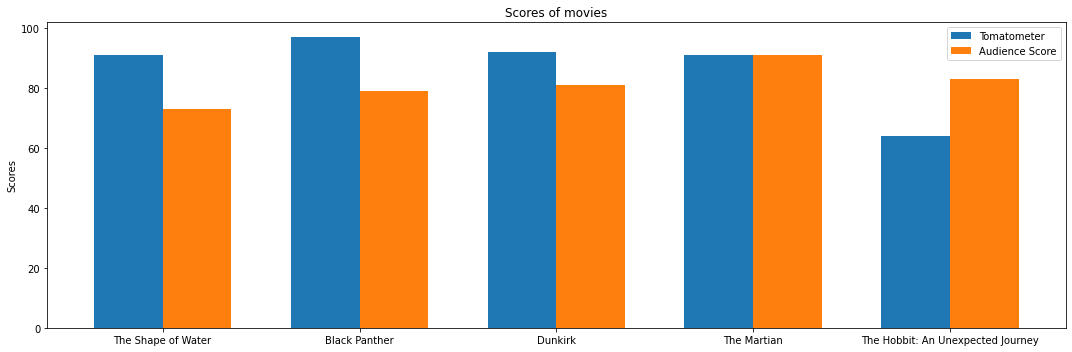

In [167]:

labels = data['MovieTitle']
Tomatometer = data['Tomatometer']
AudienceScore = data['AudienceScore']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (15,5))
rects1 = ax.bar(x - width/2, Tomatometer, width, label='Tomatometer')
rects2 = ax.bar(x + width/2, AudienceScore, width, label='Audience Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores of movies')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [141]:
data = pd.read_csv('./Data/smartphone_sales.csv')
data#.sample(5)

,Unnamed: 0,Quarter,Apple,Samsung,Huawei,Xiaomi,OPPO
0,0,3Q16,43001,71734,32490,14926,24591
1,1,4Q16,77039,76783,40804,15751,26705
2,2,1Q17,51993,78776,34181,12707,30922
3,3,2Q17,44315,82855,35964,21179,26093
4,4,3Q17,45442,85605,36502,26853,29449
5,5,4Q17,73175,74027,43887,28188,25660
6,6,1Q18,54059,78565,40426,28498,28173
7,7,2Q18,44715,72336,49847,32826,28511


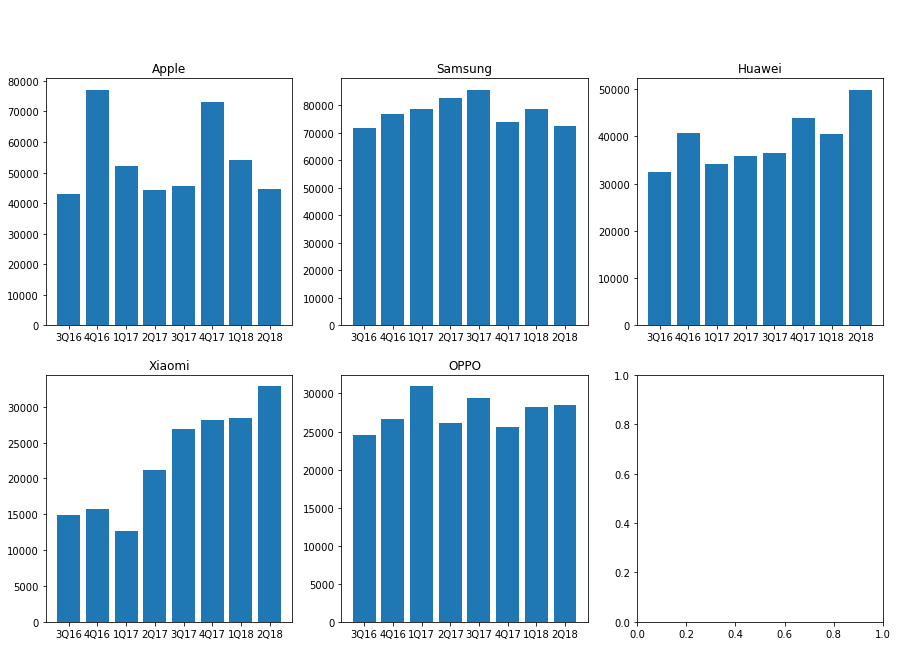

In [160]:

labels = data['Quarter']
Apple = data['Apple']
Samsung = data['Samsung']
Huawei = data['Huawei']
Xiaomi = data['Xiaomi']
OPPO = data['OPPO']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# plt.figure(2, figsize=(15, 10))
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes[0,0].bar(labels, Apple)
axes[0,0].title.set_text('Apple')

axes[0,1].bar(labels, Samsung)
axes[0,1].title.set_text('Samsung')

axes[0,2].bar(labels, Huawei)
axes[0,2].title.set_text('Huawei')

axes[1,0].bar(labels, Xiaomi)
axes[1,0].title.set_text('Xiaomi')

axes[1,1].bar(labels, OPPO)
axes[1,1].title.set_text('OPPO')

plt.suptitle(' ')
plt.show()

### Ex6:

In [43]:
data = pd.read_csv('./Data/flight_details.csv')
print(data.shape)
data.sample(5)

(144, 3)


,Years,Months,Passengers
137,2012,June,535
114,2010,July,491
119,2010,December,337
139,2012,August,606
26,2003,March,178


In [47]:
data['Months'] = pd.to_datetime(data['Months'],format = '%B').dt.month

In [68]:
data_per_month = data.groupby(['Months','Years']).agg({'Passengers':'sum'}).unstack('Years').reset_index()
data_per_month.columns = ['Months','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012']
# data_per_month.columns = ['Years','1','2','3','4','5','6','7','8','9','10','11','12']
data_per_month

,Months,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,1,112,115,145,171,196,204,242,284,315,340,360,417
1,2,118,126,150,180,196,188,233,277,301,318,342,391
2,3,132,141,178,193,236,235,267,317,356,362,406,419
3,4,129,135,163,181,235,227,269,313,348,348,396,461
4,5,121,125,172,183,229,234,270,318,355,363,420,472
5,6,135,149,178,218,243,264,315,374,422,435,472,535
6,7,148,170,199,230,264,302,364,413,465,491,548,622
7,8,148,170,199,242,272,293,347,405,467,505,559,606
8,9,136,158,184,209,237,259,312,355,404,404,463,508
9,10,119,133,162,191,211,229,274,306,347,359,407,461


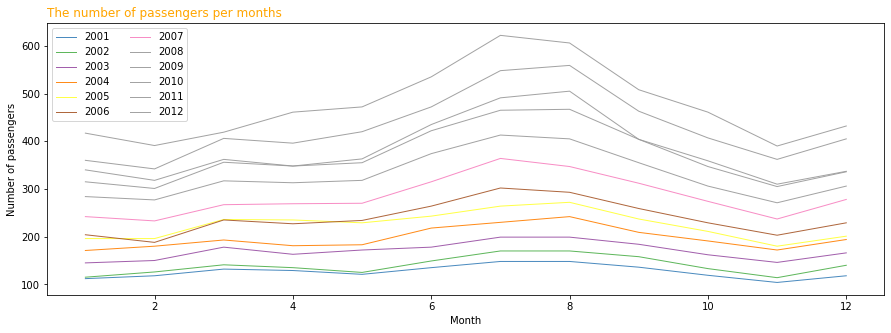

In [106]:
# chart phù hợp

plt.figure(figsize=(15, 5))
# Create a color palette
palette = plt.get_cmap('Set1')
# Plot multiple lines
num=0
for column in data_per_month.drop('Months', axis=1):
    num+=1
    plt.plot(data_per_month['Months'], data_per_month[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("The number of passengers per months", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Month")
plt.ylabel("Number of passengers")

# 
# Show the graph
plt.show()

### Ex7:

In [197]:
data = pd.read_csv('./Data/youtube.csv')
print(data.shape)
data.head(5)

(30, 3)


,channels,subs,views
0,PewDiePie,83.1,20329
1,T-Series,82.9,61057
2,5-Minute Crafts,48.0,12061
3,Canal KondZilla,46.1,22878
4,Justin Bieber,43.1,601


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   channels  30 non-null     object 
 1   subs      30 non-null     float64
 2   views     30 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [114]:
data.describe()

,subs,views
count,30.000000,30.000000
mean,37.423333,12017.366667
std,13.487969,12698.290671
min,26.400000,59.000000
25%,30.750000,2075.000000
50%,33.700000,9233.500000
75%,38.250000,16707.750000
max,83.100000,61057.000000


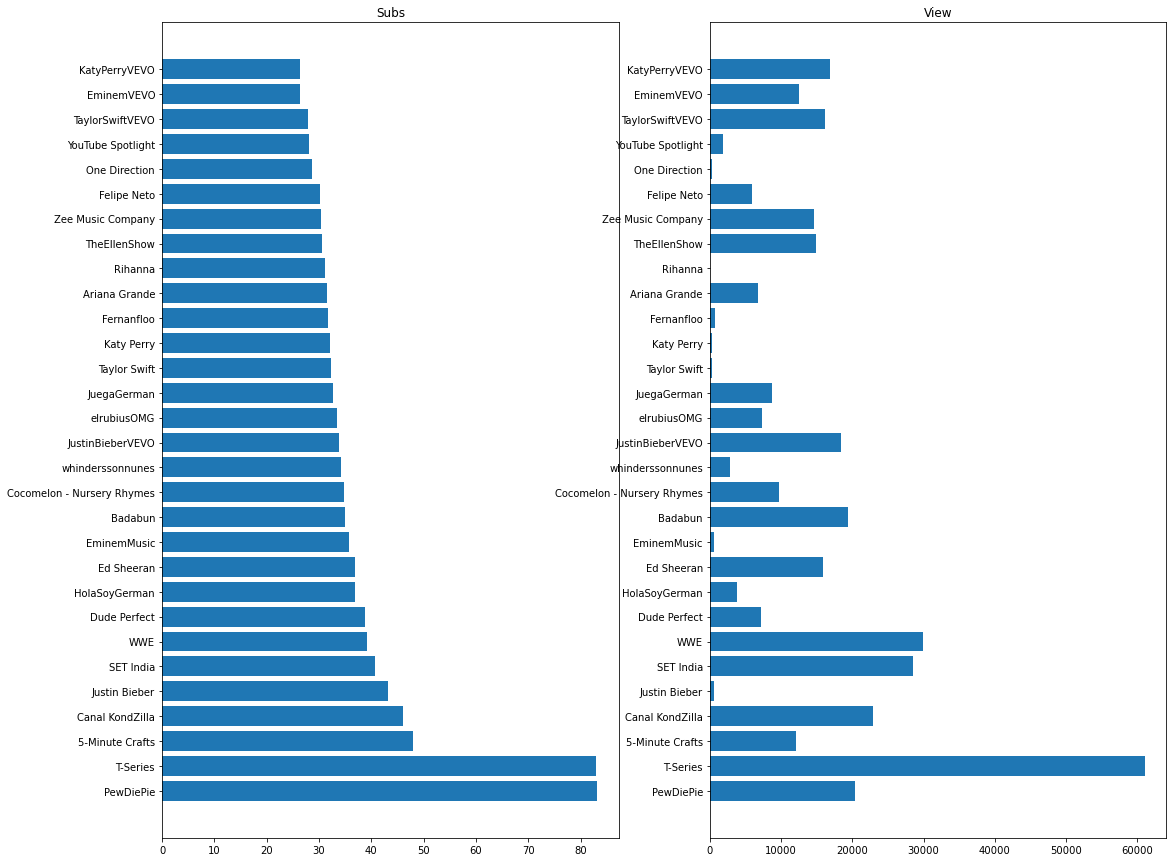

In [196]:
labels = data['channels']
subs = data['subs']
views = data['views']

x = np.arange(len(labels))  # the label locations
# width = 0  # the width of the bars

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 15))

axes[0].barh(labels, subs)
axes[0].title.set_text('Subs')

axes[1].barh(labels, views)
axes[1].title.set_text('View')

plt.show()

### Ex8:

In [84]:
week1 = pd.read_csv("./Data/Restaurant - Week 1 Sales.csv")
week2 = pd.read_csv("./Data/Restaurant - Week 2 Sales.csv")
customers = pd.read_csv("./Data/Restaurant - Customers.csv")
foods = pd.read_csv("./Data/Restaurant - Foods.csv")

In [85]:
data_week = pd.concat([week1,week2])
print(data_week.shape)
data_week.sample()

(500, 2)


,Customer ID,Food ID
148,881,5


In [86]:
print(customers.shape)
customers.sample()

(1000, 6)


,ID,First Name,Last Name,Gender,Company,Occupation
478,479,Juan,Campbell,Male,Wikizz,VP Quality Control


In [87]:
print(foods.shape)
foods.sample()

(10, 3)


,Food ID,Food Item,Price
7,8,Salad,11.25


In [88]:
data_full = customers.merge(data_week, left_on = 'ID', right_on = 'Customer ID',how = 'inner')
data_full = data_full.merge(foods, left_on = 'Food ID', right_on = 'Food ID',how = 'inner')
print(data_full.shape)
data_full#.sample(2)

(500, 10)


,ID,First Name,Last Name,Gender,Company,Occupation,Customer ID,Food ID,Food Item,Price
0,3,Roger,Black,Male,Tagfeed,Account Executive,3,2,Burrito,9.99
1,10,Steven,Ryan,Male,Twinder,Community Outreach Specialist,10,2,Burrito,9.99
2,13,Ruth,Alvarez,Female,Twitterlist,Mechanical Systems Engineer,13,2,Burrito,9.99
3,30,Pamela,Hicks,Female,Ntags,Cost Accountant,30,2,Burrito,9.99
4,51,Gloria,Kelly,Female,Agimba,Software Test Engineer IV,51,2,Burrito,9.99
...,...,...,...,...,...,...,...,...,...,...
495,881,Carl,Lawrence,Male,Fanoodle,Compensation Analyst,881,5,Pizza,2.49
496,945,Anne,Reed,Female,Twitterworks,Director of Sales,945,5,Pizza,2.49
497,951,Angela,Sanders,Female,Dabtype,Research Assistant IV,951,5,Pizza,2.49
498,966,Robert,Ford,Male,Jabbertype,Account Representative IV,966,5,Pizza,2.49


In [89]:
data_full['Food ID'].value_counts()

10    59
2     57
9     55
6     54
7     50
4     49
8     48
3     46
1     43
5     39
Name: Food ID, dtype: int64

In [90]:
data_full.describe()

,ID,Customer ID,Food ID,Price
count,500.000000,500.000000,500.000000,500.000000
mean,488.268000,488.268000,5.658000,7.773120
std,287.294679,287.294679,2.921319,7.191075
min,3.000000,3.000000,1.000000,0.990000
25%,239.750000,239.750000,3.000000,2.490000
50%,495.500000,495.500000,6.000000,4.250000
75%,743.500000,743.500000,8.000000,11.250000
max,1000.000000,1000.000000,10.000000,24.990000


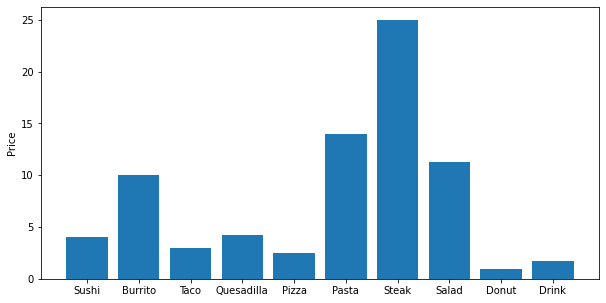

In [116]:
#chart
food_by_gender = data_full.groupby(['Food ID','Food Item','Price','Gender']).agg({'ID':'count'}).unstack('Gender').reset_index()
food_by_gender.columns = ['Food ID','Food Item','Price','Female','Male']

plt.figure(figsize = (10,5))
plt.bar('Food Item','Price', data = food_by_gender)
plt.ylabel('Price')
plt.show()

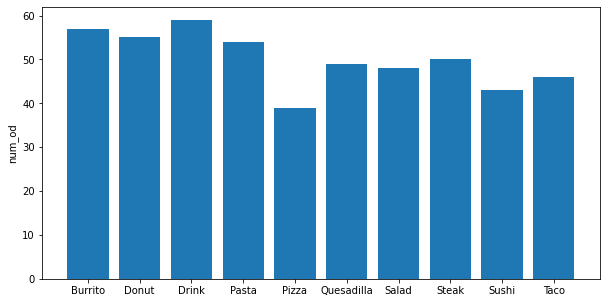

In [119]:
num_item_od = data_full.groupby('Food Item').agg({'Food ID':'count'}).reset_index()

plt.figure(figsize = (10,5))
plt.bar('Food Item','Food ID', data = num_item_od)
plt.ylabel('num_od')
plt.show()

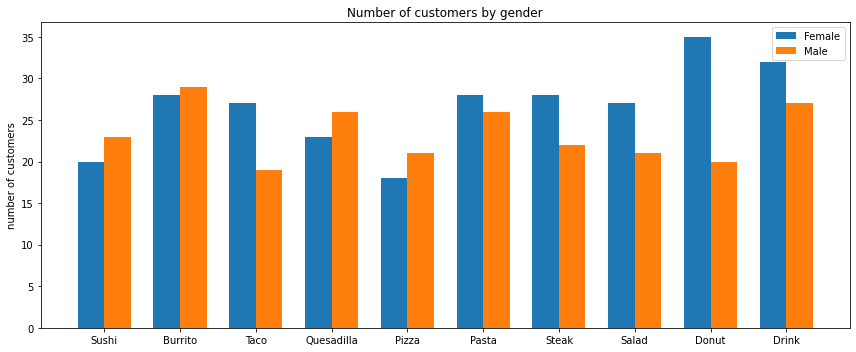

In [111]:
labels = food_by_gender['Food Item']
female = food_by_gender['Female']
male = food_by_gender['Male']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (12,5))
rects1 = ax.bar(x - width/2, female, width, label='Female')
rects2 = ax.bar(x + width/2, male, width, label='Male')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of customers')
ax.set_title('Number of customers by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [237]:
data_full.groupby('Gender').agg({'ID':'count'})

,ID
Gender,
Female,266
Male,234


In [240]:
data_full.groupby(['Food ID','Food Item','Price','Gender']).agg({'ID':'count'}).unstack('Gender')

ID     
Gender                   Female Male
Food ID Food Item  Price            
1       Sushi      3.99      20   23
2       Burrito    9.99      28   29
3       Taco       2.99      27   19
4       Quesadilla 4.25      23   26
5       Pizza      2.49      18   21
6       Pasta      13.99     28   26
7       Steak      24.99     28   22
8       Salad      11.25     27   21
9       Donut      0.99      35   20
10      Drink      1.75      32   27

In [254]:
data_full.groupby(['Company','Food ID','Food Item','Price','Gender']).agg({'ID':'count'}).unstack('Gender')

ID     
Gender                             Female Male
Company   Food ID Food Item  Price            
Abata     8       Salad      11.25    1.0  NaN
          9       Donut      0.99     1.0  NaN
Abatz     3       Taco       2.99     NaN  1.0
          8       Salad      11.25    NaN  1.0
Agimba    2       Burrito    9.99     1.0  NaN
...                                   ...  ...
Zoonoodle 3       Taco       2.99     NaN  1.0
Zooxo     6       Pasta      13.99    1.0  NaN
          10      Drink      1.75     NaN  1.0
Zoozzy    4       Quesadilla 4.25     1.0  NaN
          6       Pasta      13.99    1.0  NaN

[461 rows x 2 columns]

In [251]:
data_full.groupby(['Food ID','Food Item','Price']).agg({'Company':'count'}).sort_values('Company',ascending = False)

,,,Company
Food ID,Food Item,Price,
10,Drink,1.75,59
2,Burrito,9.99,57
9,Donut,0.99,55
6,Pasta,13.99,54
7,Steak,24.99,50
4,Quesadilla,4.25,49
8,Salad,11.25,48
3,Taco,2.99,46
1,Sushi,3.99,43


### Ex9:

In [258]:
data = pd.read_csv("./Data/final-Churn-Modelling-Test-Data.csv")
print(data.shape)
data.sample(2)

(1000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
827,10828,15809150,Maclean,644,Spain,Male,30,2,86961.79,1,0,1,9560.14,1
52,10053,15698923,Rogers,590,Spain,Male,21,7,174517.85,1,1,1,194612.75,0


In [257]:
data['Geography'].value_counts()

France     501
Germany    256
Spain      243
Name: Geography, dtype: int64

In [259]:
data['Gender'].value_counts()

Male      567
Female    433
Name: Gender, dtype: int64

In [260]:
data['HasCrCard'].value_counts()

1    680
0    320
Name: HasCrCard, dtype: int64

In [261]:
data['IsActiveMember'].value_counts()

1    529
0    471
Name: IsActiveMember, dtype: int64

In [262]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000
mean,10500.500000,1.569274e+07,652.187000,39.220000,4.86000,75160.026950,1.521000,0.68000,0.529000,101500.36066,0.260000
std,288.819436,7.313593e+04,97.936201,10.764826,2.91082,62975.377861,0.589836,0.46671,0.499408,57860.87521,0.438854
min,10001.000000,1.556586e+07,366.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,245.50000,0.000000
25%,10250.750000,1.562966e+07,582.000000,32.000000,2.00000,0.000000,1.000000,0.00000,0.000000,49099.87250,0.000000
50%,10500.500000,1.569516e+07,656.000000,38.000000,5.00000,97926.720000,1.000000,1.00000,1.000000,104081.61000,0.000000
75%,10750.250000,1.575500e+07,719.000000,44.000000,7.00000,128141.972500,2.000000,1.00000,1.000000,151514.41750,1.000000
max,11000.000000,1.581546e+07,850.000000,91.000000,10.00000,211520.250000,4.000000,1.00000,1.000000,199633.73000,1.000000


### Ex10

In [2]:
data_test = pd.read_csv("./Data/titanic_test.csv")
data_train = pd.read_csv("./Data/titanic_train.csv")

In [3]:
print(data_test.shape)
data_test.sample()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
233,1125,3,"Linehan, Mr. Michael",male,NaN,0,0,330971,7.8792,NaN,Q


In [4]:
print(data_train.shape)
data_train.sample()

(891, 12)


,PassengerId,Sex,Age,Name,Survived,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked
481,482,male,NaN,"Frost, Mr. Anthony Wood ""Archie""",0,2,0,0,239854,0.0,NaN,S


In [5]:
data_full = pd.concat([data_train, data_test])
data_full.sample()

,PassengerId,Sex,Age,Name,Survived,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked
722,723,male,34.0,"Gillespie, Mr. William Henry",0.0,2,0,0,12233,13.0,NaN,S


In [6]:
data_full.describe()

,PassengerId,Age,Survived,Pclass,SibSp,Parch,Fare
count,1309.000000,1046.000000,891.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,29.881138,0.383838,2.294882,0.498854,0.385027,33.295479
std,378.020061,14.413493,0.486592,0.837836,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,328.000000,21.000000,0.000000,2.000000,0.000000,0.000000,7.895800
50%,655.000000,28.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,982.000000,39.000000,1.000000,3.000000,1.000000,0.000000,31.275000
max,1309.000000,80.000000,1.000000,3.000000,8.000000,9.000000,512.329200


In [11]:
data_full[data_full['Age'] == data_full['Age'].min()]

,PassengerId,Sex,Age,Name,Survived,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked
354,1246,female,0.17,"Dean, Miss. Elizabeth Gladys Millvina""""",NaN,3,1,2,C.A. 2315,20.575,NaN,S


In [14]:
data_full['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [275]:
data_full['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [276]:
# Parch: Parents-children
data_full['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [280]:
# hành khách đến từ?
# C = Cherbourg; Q = Queenstown; S = Southampton
data_full['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [281]:
# SibSp: Siblings/Spouses
data_full['SibSp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [292]:
# Mối quan hệ giữa tầng lớp và chỗ ngồi
data_full.groupby(['Pclass', 'Cabin']).agg({'PassengerId':'count'})#.unstack('Cabin')

PassengerId
Pclass Cabin             
1      A10              1
       A11              1
       A14              1
       A16              1
       A18              1
...                   ...
3      F E69            1
       F G63            2
       F G73            2
       F38              1
       G6               5

[186 rows x 1 columns]

In [18]:
# khách hàng sống sót
passenger_survived = data_train[data_train['Survived'] == 1]#.value_counts()
passenger_survived#['Cabin'].value_counts()

,PassengerId,Sex,Age,Name,Survived,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,female,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,0,PC 17599,71.2833,C85,C
2,3,female,26.0,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,female,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,0,113803,53.1000,C123,S
8,9,female,27.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3,0,2,347742,11.1333,NaN,S
9,10,female,14.0,"Nasser, Mrs. Nicholas (Adele Achem)",1,2,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,female,15.0,"Najib, Miss. Adele Kiamie ""Jane""",1,3,0,0,2667,7.2250,NaN,C
879,880,female,56.0,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,1,0,1,11767,83.1583,C50,C
880,881,female,25.0,"Shelley, Mrs. William (Imanita Parrish Hall)",1,2,0,1,230433,26.0000,NaN,S
887,888,female,19.0,"Graham, Miss. Margaret Edith",1,1,0,0,112053,30.0000,B42,S


In [26]:
# all male: 843, female: 466
print(passenger_survived['Sex'].value_counts())
print("percent of male: ",109/843)
print("percent of female: ",233/466)

female    233
male      109
Name: Sex, dtype: int64
percent of male:  0.12930011862396204
percent of female:  0.5


In [27]:
passenger_survived.describe()

,PassengerId,Age,Survived,Pclass,SibSp,Parch,Fare
count,342.000000,290.000000,342.0,342.000000,342.000000,342.000000,342.000000
mean,444.368421,28.343690,1.0,1.950292,0.473684,0.464912,48.395408
std,252.358840,14.950952,0.0,0.863321,0.708688,0.771712,66.596998
min,2.000000,0.420000,1.0,1.000000,0.000000,0.000000,0.000000
25%,250.750000,19.000000,1.0,1.000000,0.000000,0.000000,12.475000
50%,439.500000,28.000000,1.0,2.000000,0.000000,0.000000,26.000000
75%,651.500000,36.000000,1.0,3.000000,1.000000,1.000000,57.000000
max,890.000000,80.000000,1.0,3.000000,4.000000,5.000000,512.329200


In [21]:
# all: 3: 709, 2: 277, 1: 323

print(passenger_survived['Pclass'].value_counts())
print("percent of 3 passenger class: ",119/709)
print("percent of 2 passenger class: ",87/277)
print("percent of 1 passenger class: ",136/323)

1    136
3    119
2     87
Name: Pclass, dtype: int64
percent of 3 passenger class:  0.16784203102961917
percent of 2 passenger class:  0.3140794223826715
percent of 1 passenger class:  0.42105263157894735


In [23]:
# all S: 914, C: 270, Q: 123, C = Cherbourg; Q = Queenstown; S = Southampton
print(passenger_survived['Embarked'].value_counts())
print("percent of S: ",217/914)
print("percent of C: ",93/270)
print("percent of Q: ",30/123)

S    217
C     93
Q     30
Name: Embarked, dtype: int64
percent of S:  0.237417943107221
percent of C:  0.34444444444444444
percent of Q:  0.24390243902439024


In [34]:
passenger_survived[(passenger_survived['SibSp'] != 0)]['SibSp'].value_counts()

1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64

In [24]:
## hành khách đi 1 mình
data_full[(data_full['Parch'] == 0) & (data_full['SibSp'] == 0)]

,PassengerId,Sex,Age,Name,Survived,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,female,26.0,"Heikkinen, Miss. Laina",1.0,3,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,male,35.0,"Allen, Mr. William Henry",0.0,3,0,0,373450,8.0500,NaN,S
5,6,male,NaN,"Moran, Mr. James",0.0,3,0,0,330877,8.4583,NaN,Q
6,7,male,54.0,"McCarthy, Mr. Timothy J",0.0,1,0,0,17463,51.8625,E46,S
11,12,female,58.0,"Bonnell, Miss. Elizabeth",1.0,1,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,female,28.0,"Henriksson, Miss. Jenny Lovisa",NaN,3,0,0,347086,7.7750,NaN,S
413,1305,male,NaN,"Spector, Mr. Woolf",NaN,3,0,0,A.5. 3236,8.0500,NaN,S
414,1306,female,39.0,"Oliva y Ocana, Dona. Fermina",NaN,1,0,0,PC 17758,108.9000,C105,C
415,1307,male,38.5,"Saether, Mr. Simon Sivertsen",NaN,3,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [32]:
passenger_survived[(passenger_survived['SibSp'] != 0)]['SibSp'].value_counts()

1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64

,PassengerId,Sex,Age,Name,Survived,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked
